# وارد کردن کتابخانه های مربوطه

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# وارد کردن prepared dataset

In [3]:
df = pd.read_csv('Prepared-data\prepared_data.csv',encoding='ISO-8859-1')
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  ...  Summer  Autumn  Holiday  Func  Fri  Sat  \
0           0.0            0.0  ...       0       0        0     1    1    0   
1           0.0            0.0  ...       0       0        0     1    1    0   
2           0.0            0.0  ...       0       0        0     1    1    0   
3           0.0            0.0  ...       0       0        0     1    1    0   
4           0.0            0.0  ...       0       0        0     1    1    0   

   Sun  Mon  Tue  Wed  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  

[5 rows x 21 columns]

# جدا کردن متغیر های وابسته و مستقل

In [4]:
# Load data - Reading seoul Data

y=df['Rented Bike Count'].copy()
X=df.drop(['Rented Bike Count'], axis=1)


In [5]:
X.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  Spring  Summer  Autumn  Holiday  Func  Fri  Sat  Sun  Mon  \
0            0.0       0       0       0        0     1    1    0    0    0   
1            0.0       0       0       0        0     1    1    0    0    0   
2            0.0       0       0       0        0     1    1    0    0    0   
3            0.0       0       0       0        0     1    1    0    0    0   
4            0.0       0       0       0        0     1    1    0    0    0   

   Tue  Wed  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [6]:
X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Spring',
       'Summer', 'Autumn', 'Holiday', 'Func', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tue', 'Wed'],
      dtype='object')

In [7]:
X.dtypes

Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Spring                         int64
Summer                         int64
Autumn                         int64
Holiday                        int64
Func                           int64
Fri                            int64
Sat                            int64
Sun                            int64
Mon                            int64
Tue                            int64
Wed                            int64
dtype: object

In [8]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

# تقسیم کردن دیتاست به دو بخش 
# Train & Test

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

# Gradient Boosting

In [10]:
# Create gradientboost REGRESSOR object
gradientregressor = GradientBoostingRegressor(max_depth=6,n_estimators=250,learning_rate=0.15)

In [11]:
# Train gradientboost REGRESSOR
model_GB = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_model_GB = model_GB.predict(X_test)

بررسی شاخص R2

In [12]:
from sklearn.metrics import r2_score
r2_gb=r2_score(y_pred_model_GB,y_test)
print("r2=",r2_gb)

r2= 0.9284571850767653


بررسی شاخص RMSE & MAE

با روش K-fold cross validation

In [14]:
from sklearn.model_selection import cross_val_score
import math
MSE_GB=-cross_val_score(model_GB,X_train,y_train, scoring= 'neg_mean_squared_error', cv=10)     #mohasebe mse ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MSE number",i+1," = " , MSE_GB[i])
    i=i+1
    
average_GB=np.average(MSE_GB)
print("average of 10 MSE : " ,average_GB)
print("RMSE Average=",math.sqrt(average_GB))

MSE number 1  =  24684.6614925491
MSE number 2  =  30613.826240951938
MSE number 3  =  35991.24311469917
MSE number 4  =  27493.36094787274
MSE number 5  =  24144.92772842748
MSE number 6  =  22589.934040904966
MSE number 7  =  31475.20496305692
MSE number 8  =  31311.38370660749
MSE number 9  =  26453.823888865114
MSE number 10  =  28115.228368273794
average of 10 MSE :  28287.359449220872
RMSE Average= 168.18846407890427


In [15]:
MAE_GB=-cross_val_score(model_GB,X_train,y_train, scoring= 'neg_mean_absolute_error', cv=10)     #mohasebe mae ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MAE number",i+1," = " , MAE_GB[i])
    i=i+1
    
average_GB=np.average(MAE_GB)
print("average of 10 MAE : " ,average_GB)

MAE number 1  =  97.95431010423857
MAE number 2  =  111.58285373762719
MAE number 3  =  108.71299469818891
MAE number 4  =  101.93975331815972
MAE number 5  =  96.24206007357942
MAE number 6  =  99.59830057729839
MAE number 7  =  102.02024645233512
MAE number 8  =  99.89553490410388
MAE number 9  =  101.41101757019167
MAE number 10  =  98.21066317885628
average of 10 MAE :  101.75677346145793


نمودار میزان اهمیت هر متغیر از نظر روش

Gradient Boosting

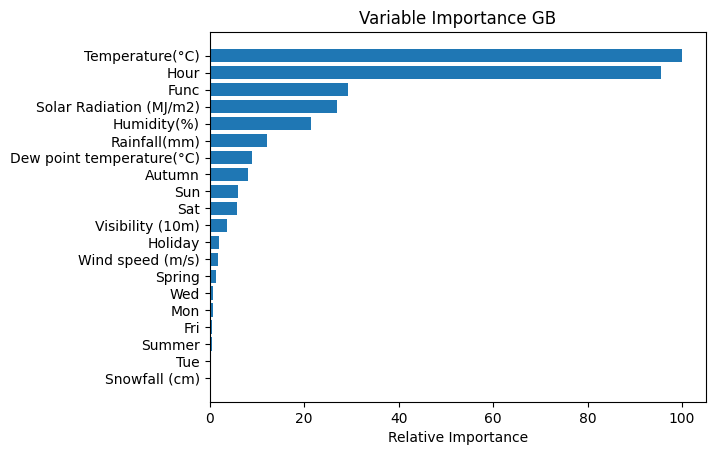

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model_GB.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance GB')
plt.show()

مقایسه مقادیر پیشبینی شده با مقادیر داده های تست

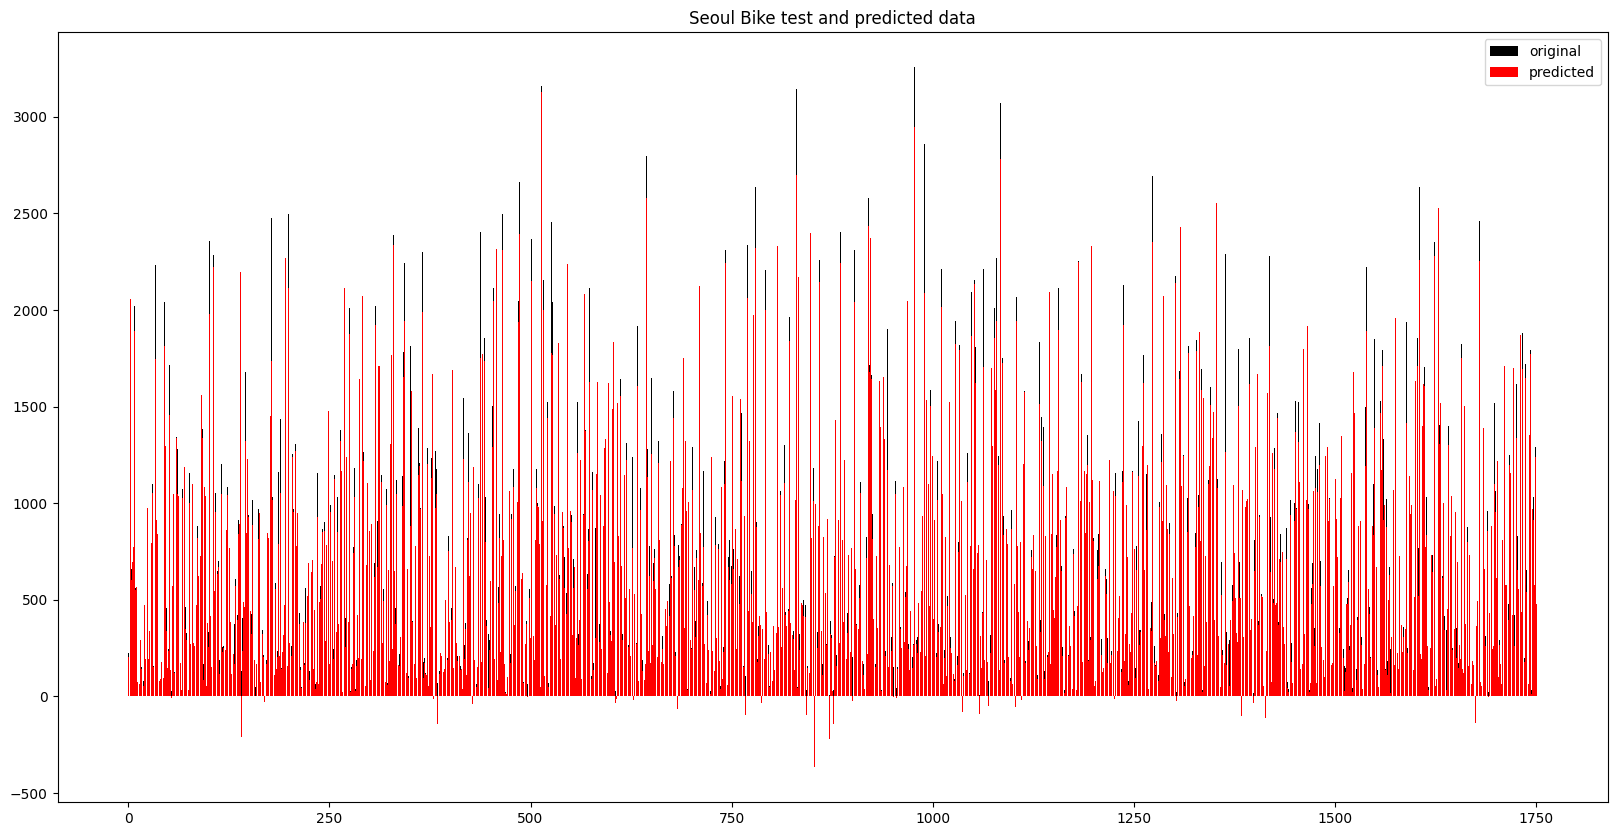

In [17]:
x_ax = range(len(y_test))
plt.figure(figsize = (20,10))
plt.bar(x_ax,y_test,label="original",color="black")
plt.bar(x_ax, y_pred_model_GB, label="predicted",color="red")
plt.title("Seoul Bike test and predicted data")
plt.legend()
plt.show()

# Gradient Boosting- hyperparameter tuning

تنظیم پارامتر های مدل جهت کمتر کردن خطا

In [18]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.10,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='neg_mean_squared_error')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 250}, -43437.339880604624)

# **XGBOOST**

In [19]:
import math
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [20]:
# Create XGboost REGRESSOR object
xgbr=XGBRegressor(learning_rate= 0.05, max_depth= 7,n_estimators= 500,verbosity= 0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [21]:
# Train XGboost REGRESSOR
model_XGB=xgbr.fit(X_train,y_train)
score_XGB=xgbr.score(X_train,y_train)
print("Training score:", score_XGB)

Training score: 0.990561387740218


بررسی شاخص R2 

In [22]:
#Predict the response for test dataset
y_pred_XGB=model_XGB.predict(X_test)
r2_XGB=r2_score(y_test,y_pred_XGB)
print("R2:",r2_XGB)

R2: 0.9398895688165766


بررسی RMSE&MAE

با روش K-fold cross validation

In [23]:
MSE_XGB=-cross_val_score(model_XGB,X_train,y_train, scoring= 'neg_mean_squared_error', cv=10)     #mohasebe mse ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MSE number",i+1," = " , MSE_XGB[i])
    i=i+1
    
average_XGB=np.average(MSE_XGB)
print("average of 10 MSE : " ,average_XGB)
print("RMSE Average=",math.sqrt(average_XGB))

MSE number 1  =  22258.60738111814
MSE number 2  =  27528.257518757087
MSE number 3  =  36338.96405436511
MSE number 4  =  22744.085343053477
MSE number 5  =  25470.233717102787
MSE number 6  =  22978.011736799035
MSE number 7  =  28673.234773260912
MSE number 8  =  30570.644145588143
MSE number 9  =  22951.83524665673
MSE number 10  =  24537.245751572143
average of 10 MSE :  26405.111966827353
RMSE Average= 162.49649832174032


In [24]:
MAE_XGB=-cross_val_score(model_XGB,X_train,y_train, scoring= 'neg_mean_absolute_error', cv=10)     #mohasebe mae ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MAE number",i+1," = " , MAE_XGB[i])
    i=i+1
    
average_XGB=np.average(MAE_XGB)
print("average of 10 MAE : " ,average_XGB)

MAE number 1  =  90.07200727007019
MAE number 2  =  106.58096053562899
MAE number 3  =  105.54741346853096
MAE number 4  =  93.58250145369692
MAE number 5  =  93.08336996156378
MAE number 6  =  97.63864427490343
MAE number 7  =  95.27462159617991
MAE number 8  =  97.34726231346457
MAE number 9  =  93.78615729110581
MAE number 10  =  92.93998137005738
average of 10 MAE :  96.5852919535202


نمودار میزان اهمیت هر متغیر از نظر روش

XGBoosting

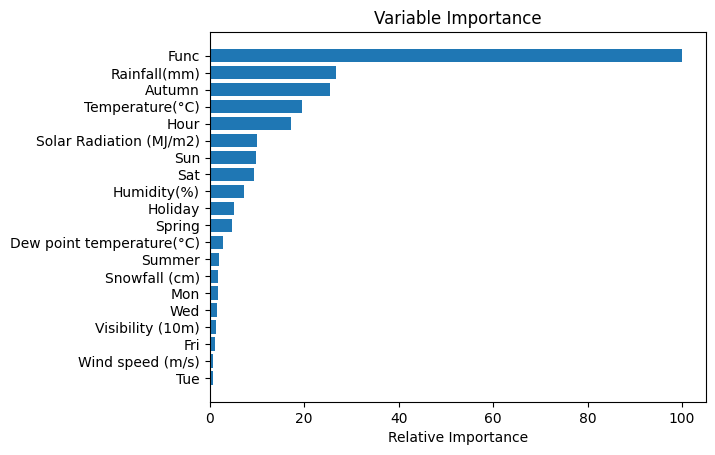

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model_XGB.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

مقایسه مقادیر پیشبینی شده با مقادیر داده های تست

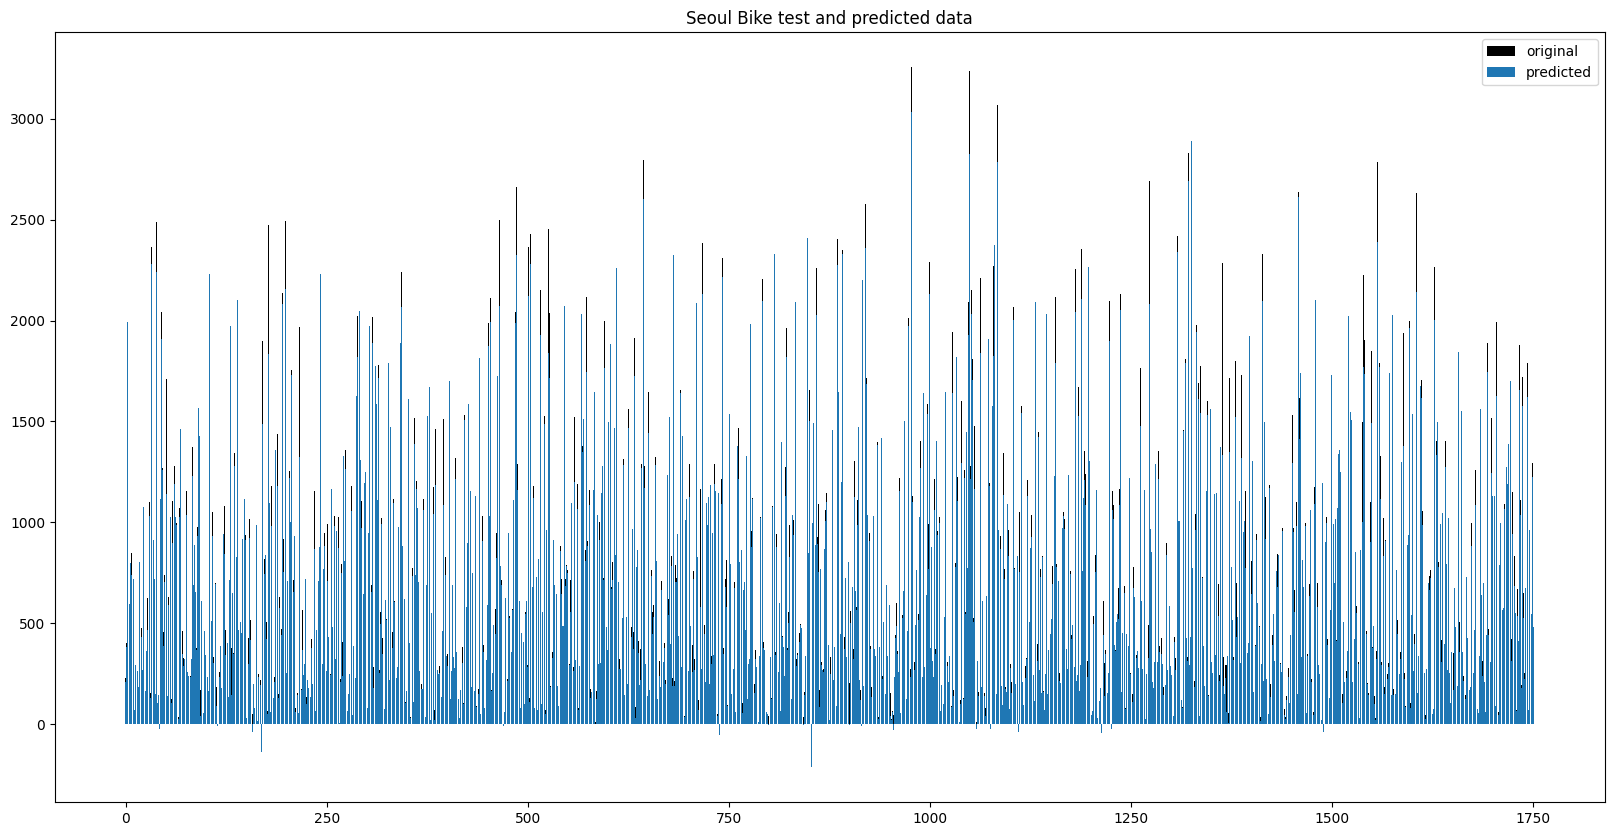

In [26]:
x_ax = range(len(y_test))
plt.figure(figsize = (20,10))
plt.bar(x_ax,y_test,label="original",color="black")
plt.bar(x_ax, y_pred_XGB, label="predicted")
plt.title("Seoul Bike test and predicted data")
plt.legend()
plt.show()

# XGBOOST-hyperparameter tuning

تنظیم پارامتر های مدل جهت کمتر کردن خطا

In [27]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        scoring='neg_mean_squared_error')
xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

[17:38:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[17:38:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[17:38:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objecti

# linear regression

In [28]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# Create linear REGRESSOR object
lr=linear_model.LinearRegression()
# Train linear REGRESSOR
model_lr=lr.fit(X_train,y_train)

In [29]:
model_lr.score(X_train,y_train)

0.5574807157289076

In [30]:
#Predict the response for test dataset

ypred_lr=model_lr.predict(X_test)


بررسی شاخص R2

In [31]:
r2_lr=r2_score(y_test,ypred_lr)
print("R2:",r2_lr)

R2: 0.542987654416606


بررسی RMSE & MAE

با روش K fold cross validation

In [32]:
MSE_lr=-cross_val_score(model_lr,X_train,y_train, scoring= 'neg_mean_squared_error', cv=10)     #mohasebe mse ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MSE number",i+1," = " , MSE_lr[i])
    i=i+1
    
average_lr=np.average(MSE_lr)
print("average of 10 MSE : " ,average_lr)
print("RMSE Average=",math.sqrt(average_lr))

MSE number 1  =  176348.96798311514
MSE number 2  =  221877.53222450506
MSE number 3  =  196465.74753707912
MSE number 4  =  170049.92068470066
MSE number 5  =  181755.87832607335
MSE number 6  =  187591.97807870392
MSE number 7  =  180559.03967100233
MSE number 8  =  181930.16764327599
MSE number 9  =  189958.29721507826
MSE number 10  =  185930.6780271278
average of 10 MSE :  187246.82073906617
RMSE Average= 432.7202569086247


In [33]:
MAE_lr=-cross_val_score(model_lr,X_train,y_train, scoring= 'neg_mean_absolute_error', cv=10)     #mohasebe mae ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MAE number",i+1," = " , MAE_lr[i])
    i=i+1
    
average_lr=np.average(MAE_lr)
print("average of 10 MAE : " ,average_lr)

MAE number 1  =  314.285925780774
MAE number 2  =  344.02572905901775
MAE number 3  =  333.7572859272564
MAE number 4  =  307.7770122032027
MAE number 5  =  322.22430393246714
MAE number 6  =  324.891483077723
MAE number 7  =  318.95804092689735
MAE number 8  =  320.37442550447867
MAE number 9  =  324.58343059152924
MAE number 10  =  328.44937991508465
average of 10 MAE :  323.9327016918431


مقایسه مقادیر پیشبینی شده با مقادیر داده های تست

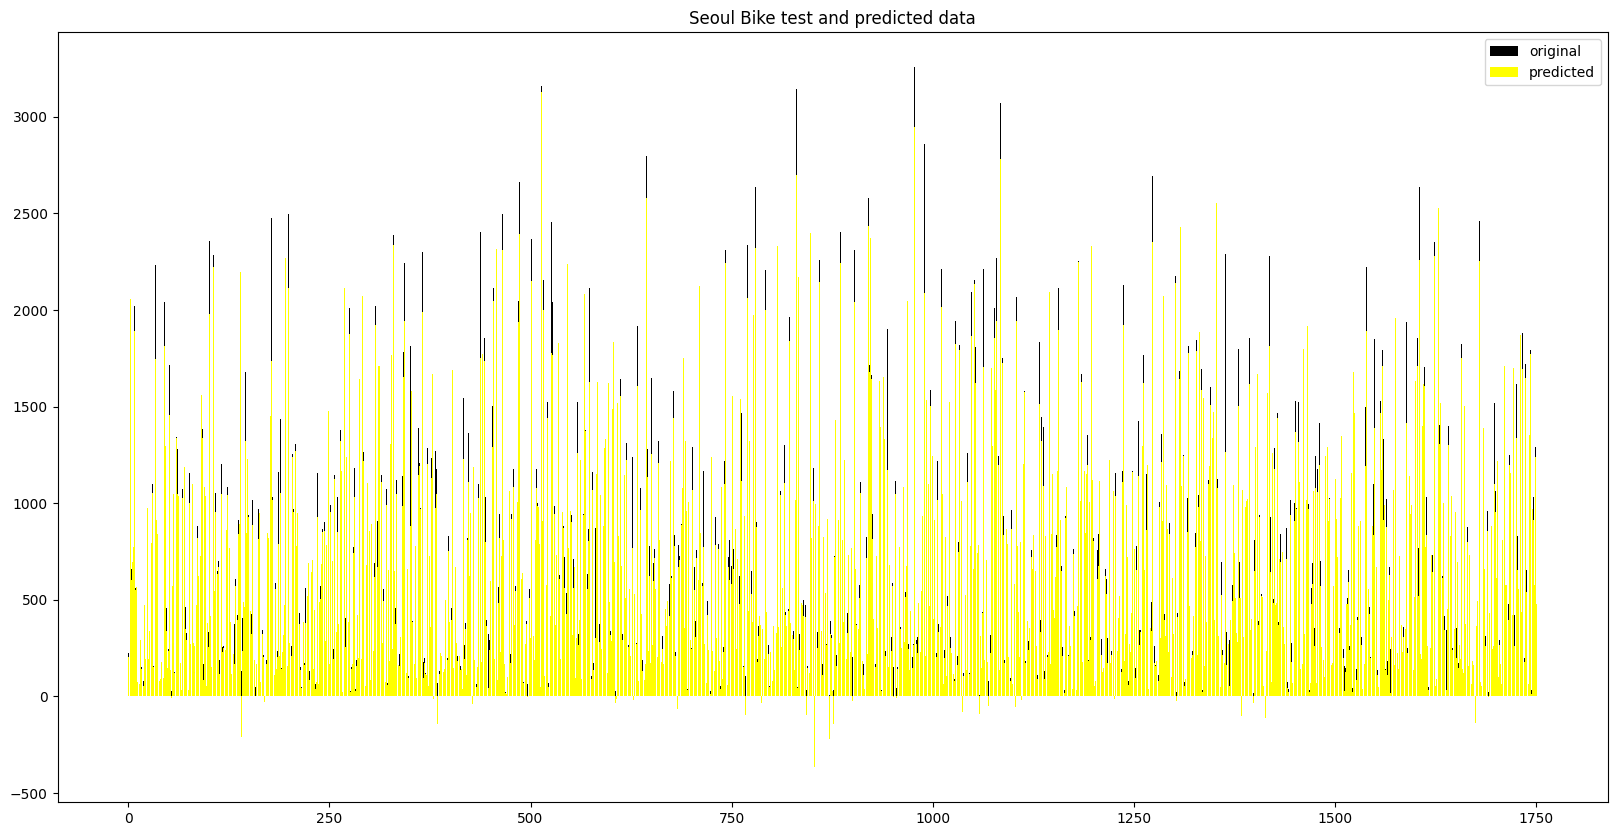

In [34]:
x_ax = range(len(y_test))
plt.figure(figsize = (20,10))
plt.bar(x_ax,y_test,label="original",color="black")
plt.bar(x_ax, y_pred_model_GB, label="predicted",color="yellow")
plt.title("Seoul Bike test and predicted data")
plt.legend()
plt.show()

# Light gradient boosting

In [36]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import lightgbm as lgb
from lightgbm import LGBMRegressor
# Create LGboost REGRESSOR object
model_LGB = LGBMRegressor(learning_rate= 0.1, max_depth= -1, n_estimators=250, num_leaves= 50)
'''cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_LGB, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))'''

"cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)\nn_scores = cross_val_score(model_LGB, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')\n# report performance\nprint('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))"

In [37]:
# Train LGboost REGRESSOR

model_LGB.fit(X_test,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 20
[LightGBM] [Info] Start training from score 710.800228


LGBMRegressor(n_estimators=250, num_leaves=50)

In [38]:
#Predict the response for test dataset
y_pred_LGB=model_LGB.predict(X_test)


بررسی شاخص R2

In [39]:
r2_LGB=r2_score(y_test,y_pred_LGB)
print("R2:",r2_LGB)

R2: 0.9982039097973981


بررسی RMSE&MAE

با روش K fold cross validation

In [40]:
MSE_LGB=-cross_val_score(model_LGB,X_train,y_train, scoring= 'neg_mean_squared_error', cv=10)     #mohasebe mse ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MSE number",i+1," = " , MSE_LGB[i])
    i=i+1
    
average_LGB=np.average(MSE_LGB)
print("average of 10 MSE : " ,average_LGB)
print("RMSE Average=",math.sqrt(average_LGB))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 6307, number of used features: 20
[LightGBM] [Info] Start training from score 705.520374
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 6307, number of used features: 20
[LightGBM] [Info] Start training from score 700.302045
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

In [41]:
MAE_LGB=-cross_val_score(model_LGB,X_train,y_train, scoring= 'neg_mean_absolute_error', cv=10)     #mohasebe mae ba ravesh k-fold 
                                                                                #k-fold ba k=10
i=0
while i<10 : 
    print("MAE number",i+1," = " , MAE_LGB[i])
    i=i+1
    
average_LGB=np.average(MAE_LGB)
print("average of 10 MAE : " ,average_LGB)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 6307, number of used features: 20
[LightGBM] [Info] Start training from score 705.520374
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 6307, number of used features: 20
[LightGBM] [Info] Start training from score 700.302045
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

نمودار مقایسه مقادیر پیش بینی شده و داده های تست

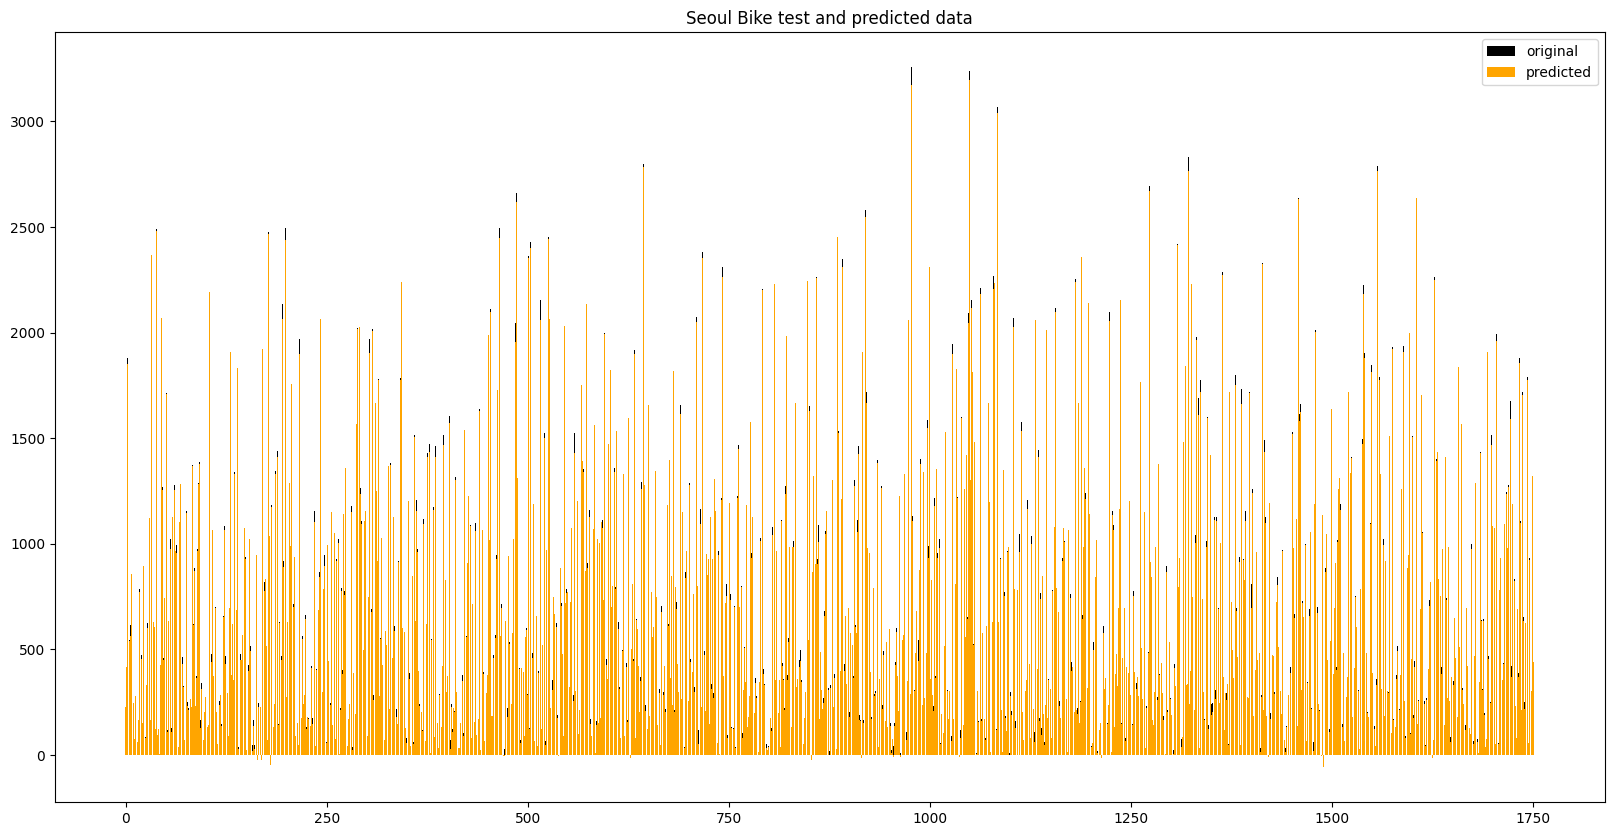

In [42]:
x_ax = range(len(y_test))
plt.figure(figsize = (20,10))
plt.bar(x_ax,y_test,label="original",color="black")
plt.bar(x_ax, y_pred_LGB, label="predicted",color="orange")
plt.title("Seoul Bike test and predicted data")
plt.legend()
plt.show()

نمودار میزان اهمیت هر متغیر از نظر روش

LGBoosting

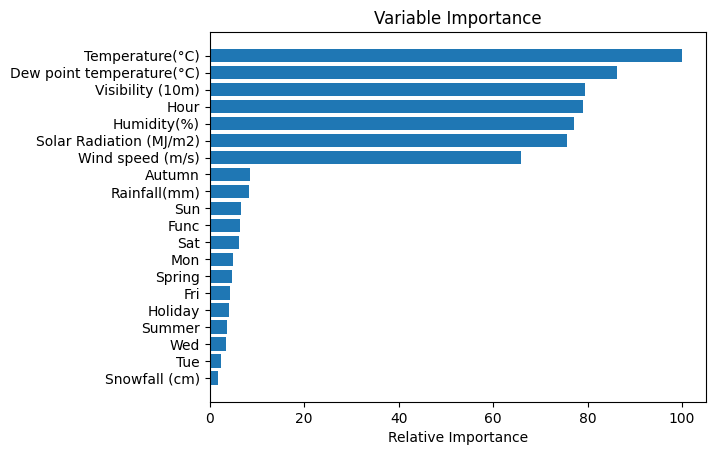

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model_LGB.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# light GBOOSTING-hyperparameter tuning

In [44]:
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid_lgb = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, scoring='neg_mean_squared_error', cv=5)
grid_lgb.fit(X_train, y_train)

reg_lgb = lgb.LGBMRegressor(random_state=0)
reg_lgb.fit(X_train,y_train)

lgbm_tuned = grid_lgb.best_estimator_

r2_tuned = grid_lgb.best_params_
r2_regular = r2_score(y_train, reg_lgb.predict(X_train))
print(r2_tuned)
print(r2_regular)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 5606, number of used features: 20
[LightGBM] [Info] Start training from score 702.734570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 5606, number of used features: 20
[LightGBM] [Info] Start training from score 698.276133
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig